In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn 
import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer


In [15]:
b_cal=pd.read_csv('BostonData/calendar.csv', parse_dates=['date'])
b_rev=pd.read_csv('BostonData/reviews.csv', parse_dates=['date'])
b_list=pd.read_csv('BostonData/listings.csv')
s_cal=pd.read_csv('SeattleData/calendar.csv', parse_dates=['date'])
s_rev=pd.read_csv('SeattleData/reviews.csv', parse_dates=['date'])
s_list=pd.read_csv('SeattleData/listings.csv')
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 15)

In [16]:
# pd.get_dummies(b_list[['property_type',
# 'room_type',
# 'bed_type',
# 'cancellation_policy']])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

ohe_columns =  ['property_type',
'room_type',
'bed_type',
'cancellation_policy']
enc = OneHotEncoder()

def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df
new_df = b_list[ohe_columns]
new_df=dummyEncode(new_df)
b_list.drop(ohe_columns,axis=1)
b_list=pd.concat([b_list, new_df],axis=1)
# transformed_df = pd.DataFrame(
#     le.fit_transform(b_list),
#     index = b_list.index)
# transformed_df = pd.concat([X_train.drop(ohe_columns,axis=1),transformed_df],axis=1)
# display(transformed_df)

# print(enc.fit_transform(b_list))
# b_list.drop(['property_type',
# 'room_type',
# 'bed_type',
# 'cancellation_policy'])\
new_df = s_list[ohe_columns]
new_df=dummyEncode(new_df)
s_list.drop(ohe_columns,axis=1)
s_list=pd.concat([s_list, new_df],axis=1)

/var/folders/dc/11dz__fx4n117dfk45w48w300000gn/T/ipykernel_23880/3970809099.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = le.fit_transform(df[feature])
/var/folders/dc/11dz__fx4n117dfk45w48w300000gn/T/ipykernel_23880/3970809099.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = le.fit_transform(df[feature])


In [17]:
b_cal['avail'] = b_cal.available.apply(lambda x: True if x=='t' else False)
b_cal.tail()

,listing_id,date,available,price,avail
1308885,14504422,2016-09-10,f,NaN,False
1308886,14504422,2016-09-09,f,NaN,False
1308887,14504422,2016-09-08,f,NaN,False
1308888,14504422,2016-09-07,f,NaN,False
1308889,14504422,2016-09-06,f,NaN,False


In [18]:
b_cal.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                 object
avail                   bool
dtype: object

In [20]:
s_cal['avail'] = s_cal.available.apply(lambda x: True if x=='t' else False)

s_cal.price = s_cal.price.str.replace('$','').str.replace(',','').astype(float)#Cast to float
b_cal.price = b_cal.price.str.replace('$','').str.replace(',','').astype(float)#Cast to float
s_list.price = s_list.price.str.replace('$','').str.replace(',','').astype(float)#Cast to float
b_list.price = b_list.price.str.replace('$','').str.replace(',','').astype(float)#Cast to float
s_list.security_deposit = s_list.security_deposit.str.replace('$','').str.replace(',','').astype(float)#Cast to float
b_list.security_deposit = b_list.security_deposit.str.replace('$','').str.replace(',','').astype(float)#Cast to float

s_list.cleaning_fee=s_list.cleaning_fee.fillna(0)
b_list.cleaning_fee=b_list.cleaning_fee.fillna(0)
s_list.security_deposit=s_list.security_deposit.fillna(0)
b_list.security_deposit=b_list.security_deposit.fillna(0)
s_list.host_is_superhost = s_list.host_is_superhost.apply(lambda x: True if x=='t' else False)
b_list.host_is_superhost = b_list.host_is_superhost.apply(lambda x: True if x=='t' else False)
s_list.host_response_rate = s_list.host_response_rate.str.replace('%','').astype(float)
b_list.host_response_rate = b_list.host_response_rate.str.replace('%','').astype(float)
s_list.host_has_profile_pic = s_list.host_has_profile_pic.apply(lambda x: True if x=='t' else False)
b_list.host_has_profile_pic = b_list.host_has_profile_pic.apply(lambda x: True if x=='t' else False)
s_list.host_identity_verified = s_list.host_identity_verified.apply(lambda x: True if x=='t' else False)
b_list.host_identity_verified = b_list.host_identity_verified.apply(lambda x: True if x=='t' else False)
s_list.instant_bookable = s_list.instant_bookable.apply(lambda x: True if x=='t' else False)
b_list.instant_bookable = b_list.instant_bookable.apply(lambda x: True if x=='t' else False)
s_list.require_guest_phone_verification = s_list.require_guest_phone_verification.apply(lambda x: True if x=='t' else False)
b_list.require_guest_phone_verification = b_list.require_guest_phone_verification.apply(lambda x: True if x=='t' else False)
s_list.require_guest_profile_picture = s_list.require_guest_profile_picture.apply(lambda x: True if x=='t' else False)
b_list.require_guest_profile_picture = b_list.require_guest_profile_picture.apply(lambda x: True if x=='t' else False)
 

AttributeError: Can only use .str accessor with string values!

In [21]:
b_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [22]:
b_rev.dtypes

listing_id                int64
id                        int64
date             datetime64[ns]
reviewer_id               int64
reviewer_name            object
comments                 object
dtype: object

In [23]:
b_list.head()
b_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

<AxesSubplot:xlabel='review_scores_rating', ylabel='Count'>

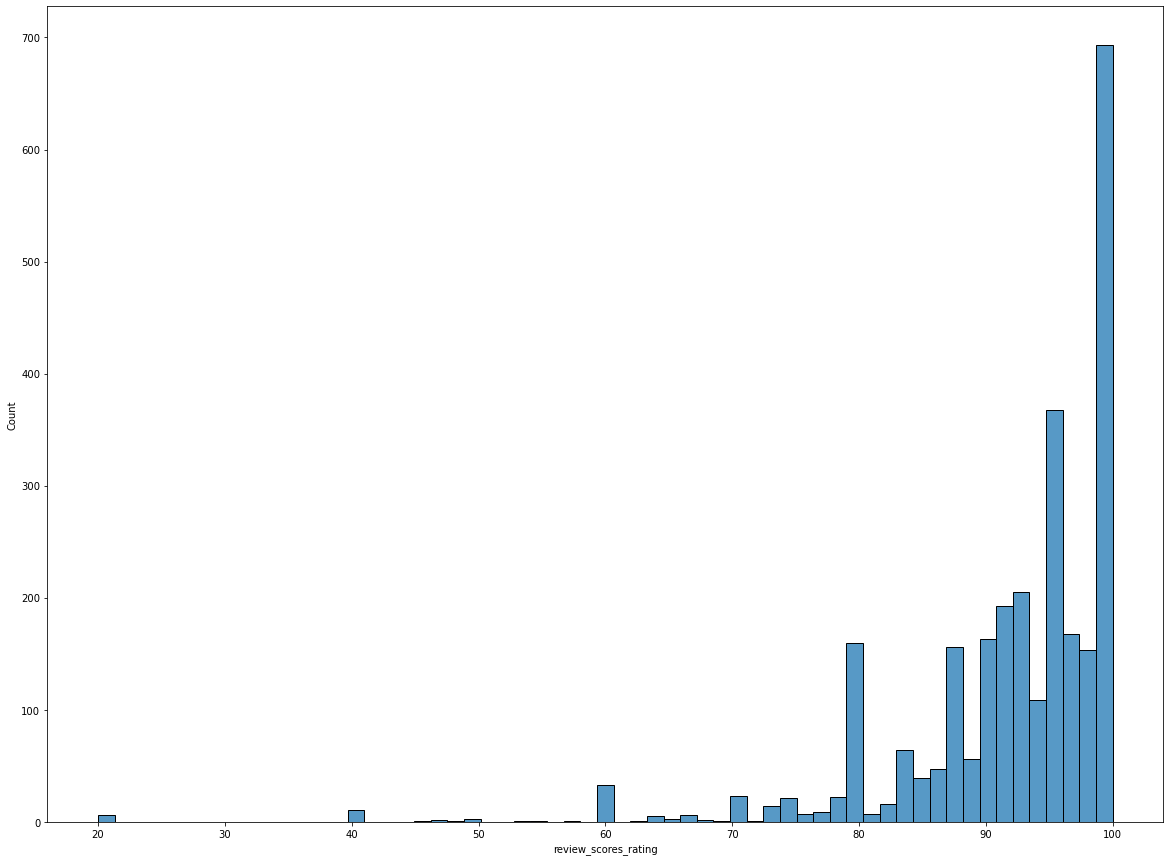

In [24]:
sns.histplot(data=b_list.review_scores_rating)

<AxesSubplot:xlabel='review_scores_rating', ylabel='Count'>

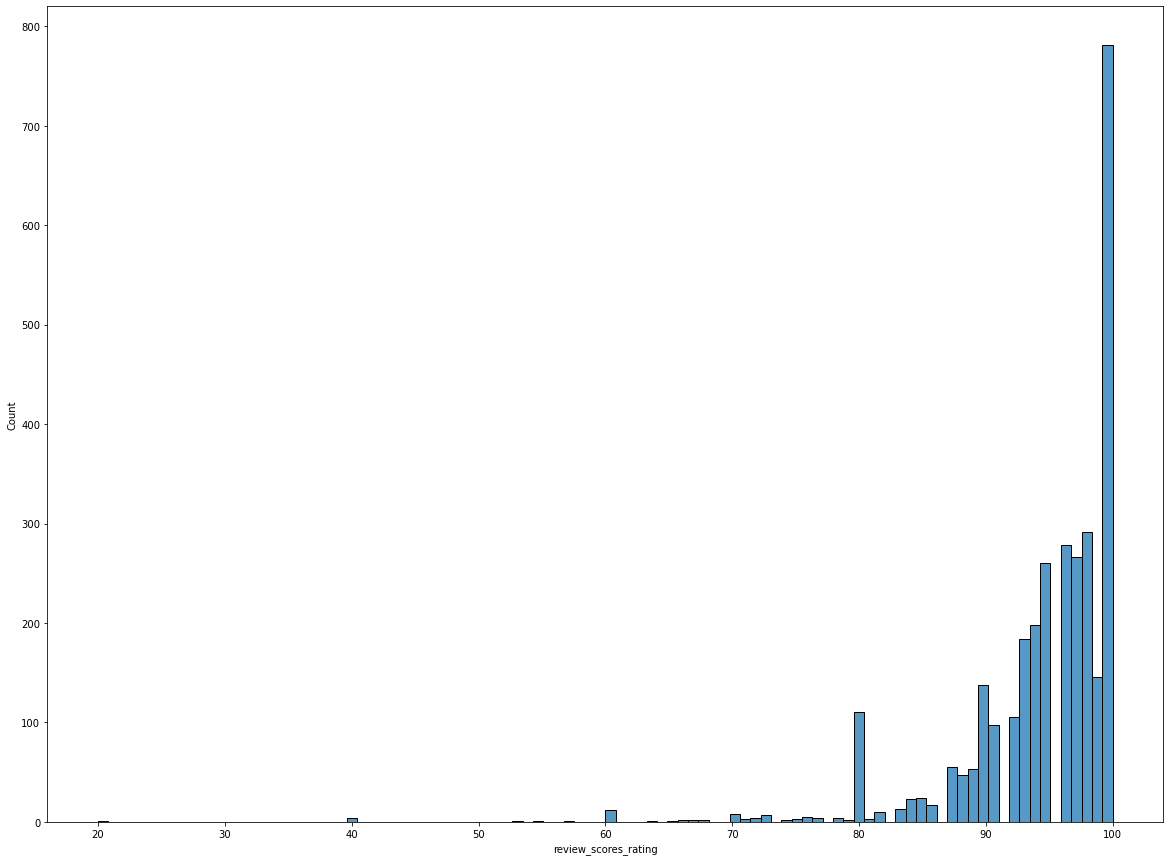

In [25]:
sns.histplot(data=s_list.review_scores_rating)

<AxesSubplot:xlabel='date', ylabel='avail'>

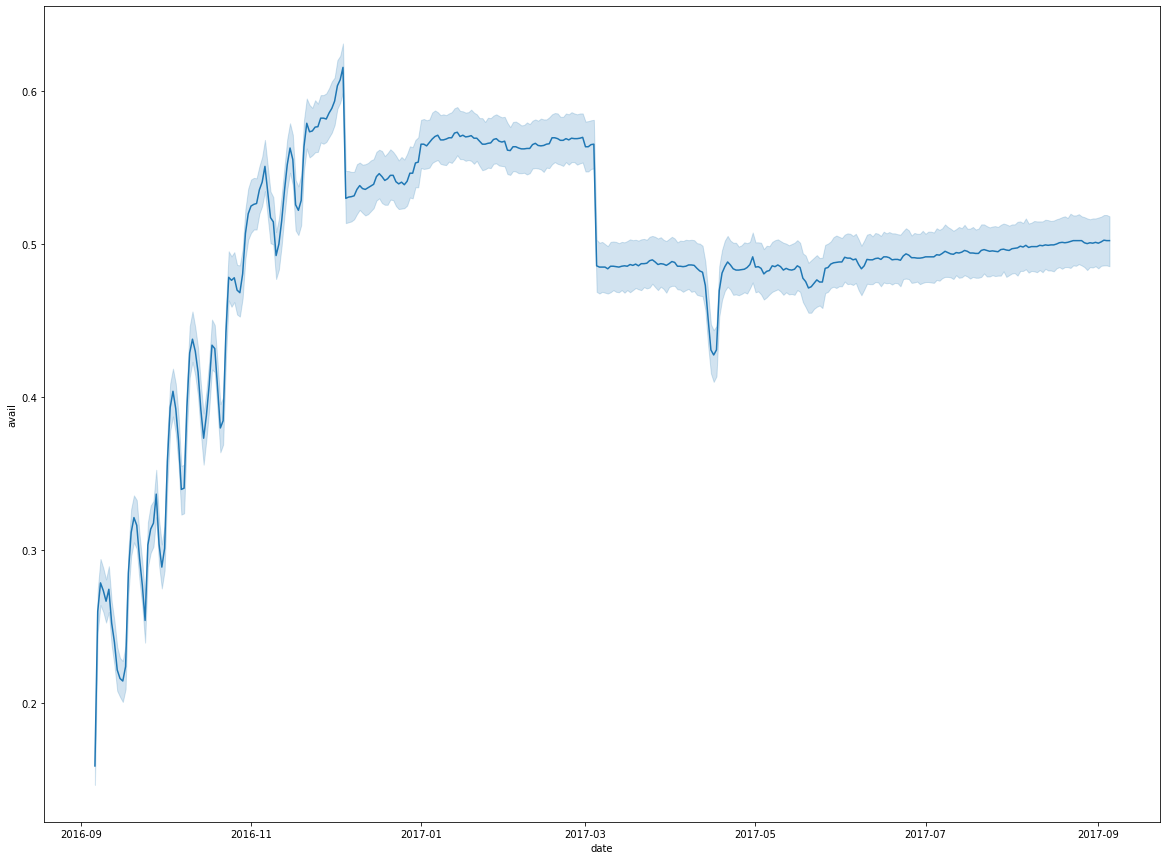

In [26]:
sns.lineplot(data=b_cal, x='date', y='avail')
#sns.lineplot(data=b_cal, x='date',y='price')

<AxesSubplot:xlabel='date', ylabel='avail'>

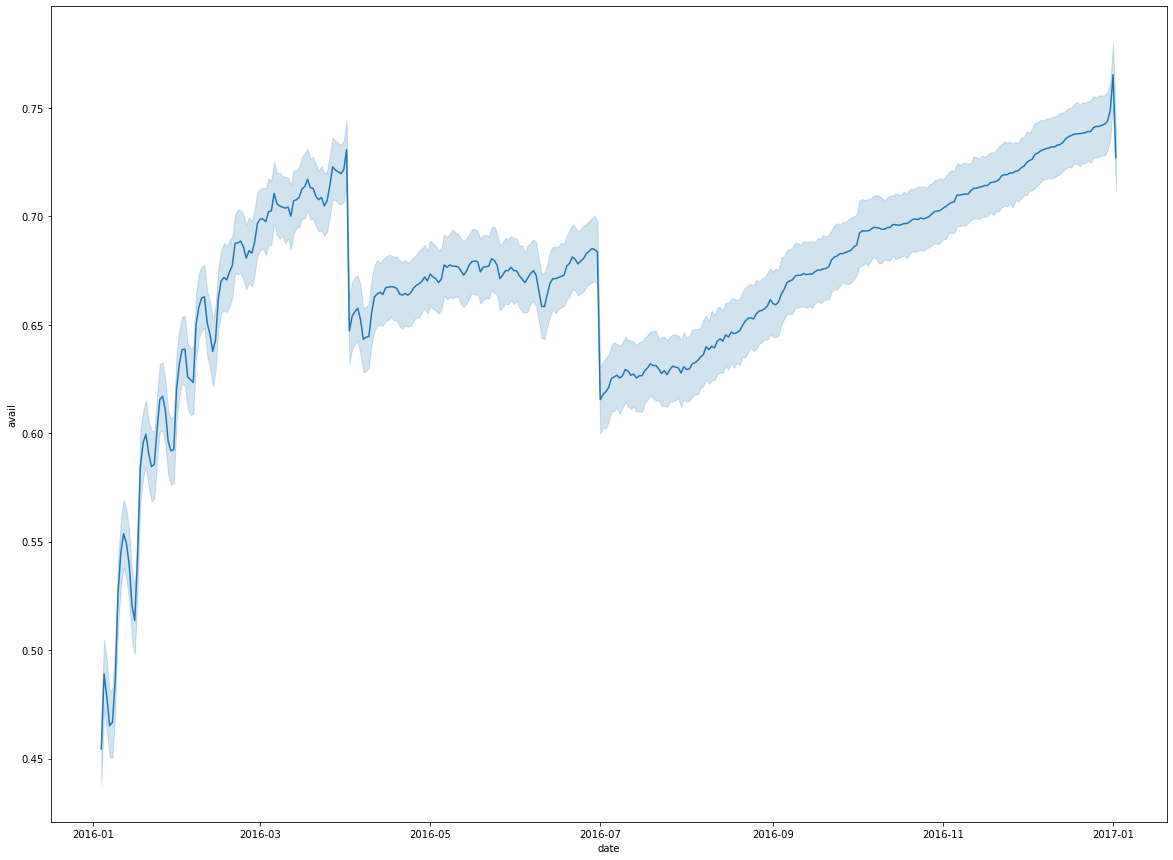

In [27]:
sns.lineplot(data=s_cal, x='date', y='avail')
#sns.lineplot(data=s_cal, x='date',y='price')

In [28]:
b_list.describe()

,id,scrape_id,host_id,host_response_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month,property_type,room_type,bed_type,cancellation_policy
count,3.585000e+03,3.585000e+03,3.585000e+03,3114.000000,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,...,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,94.989082,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,...,9.414043,9.168234,NaN,NaN,12.733891,1.970908,1.884240,0.429010,3.909902,1.210042
std,4.500787e+06,8.516813e-01,2.292781e+07,12.517686,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,...,0.903436,1.011116,NaN,NaN,29.415076,2.120561,3.342476,0.538211,0.511011,0.877998
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,...,2.000000,2.000000,NaN,NaN,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,4.679319e+06,2.016091e+13,6.103425e+06,97.000000,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,...,9.000000,9.000000,NaN,NaN,1.000000,0.480000,0.000000,0.000000,4.000000,0.000000
50%,8.577620e+06,2.016091e+13,1.928100e+07,100.000000,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,...,10.000000,9.000000,NaN,NaN,2.000000,1.170000,0.000000,0.000000,4.000000,1.000000
75%,1.278953e+07,2.016091e+13,3.622147e+07,100.000000,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,...,10.000000,10.000000,NaN,NaN,6.000000,2.720000,4.000000,1.000000,4.000000,2.000000
max,1.493346e+07,2.016091e+13,9.385411e+07,100.000000,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,...,10.000000,10.000000,NaN,NaN,136.000000,19.150000,13.000000,2.000000,4.000000,3.000000


In [29]:
s_list.describe()

,id,scrape_id,host_id,host_response_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month,property_type,room_type,bed_type,cancellation_policy
count,3.818000e+03,3.818000e+03,3.818000e+03,3295.000000,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,...,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,94.886798,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,...,9.809599,9.608916,9.452245,NaN,2.946307,2.078919,4.927187,0.365113,3.910424,1.069932
std,2.962660e+06,0.000000e+00,1.458382e+07,11.866705,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,...,0.568211,0.629053,0.750259,NaN,5.893029,1.822348,4.623123,0.541453,0.475043,0.817084
min,3.335000e+03,2.016010e+13,4.193000e+03,17.000000,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,...,2.000000,4.000000,2.000000,NaN,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000
25%,3.258256e+06,2.016010e+13,3.275204e+06,98.000000,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,...,10.000000,9.000000,9.000000,NaN,1.000000,0.695000,0.000000,0.000000,4.000000,0.000000
50%,6.118244e+06,2.016010e+13,1.055814e+07,100.000000,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,...,10.000000,10.000000,10.000000,NaN,1.000000,1.540000,9.000000,0.000000,4.000000,1.000000
75%,8.035127e+06,2.016010e+13,2.590309e+07,100.000000,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,...,10.000000,10.000000,10.000000,NaN,2.000000,3.000000,9.000000,1.000000,4.000000,2.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,100.000000,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,...,10.000000,10.000000,10.000000,NaN,37.000000,12.150000,16.000000,2.000000,4.000000,2.000000


<AxesSubplot:xlabel='date', ylabel='price'>

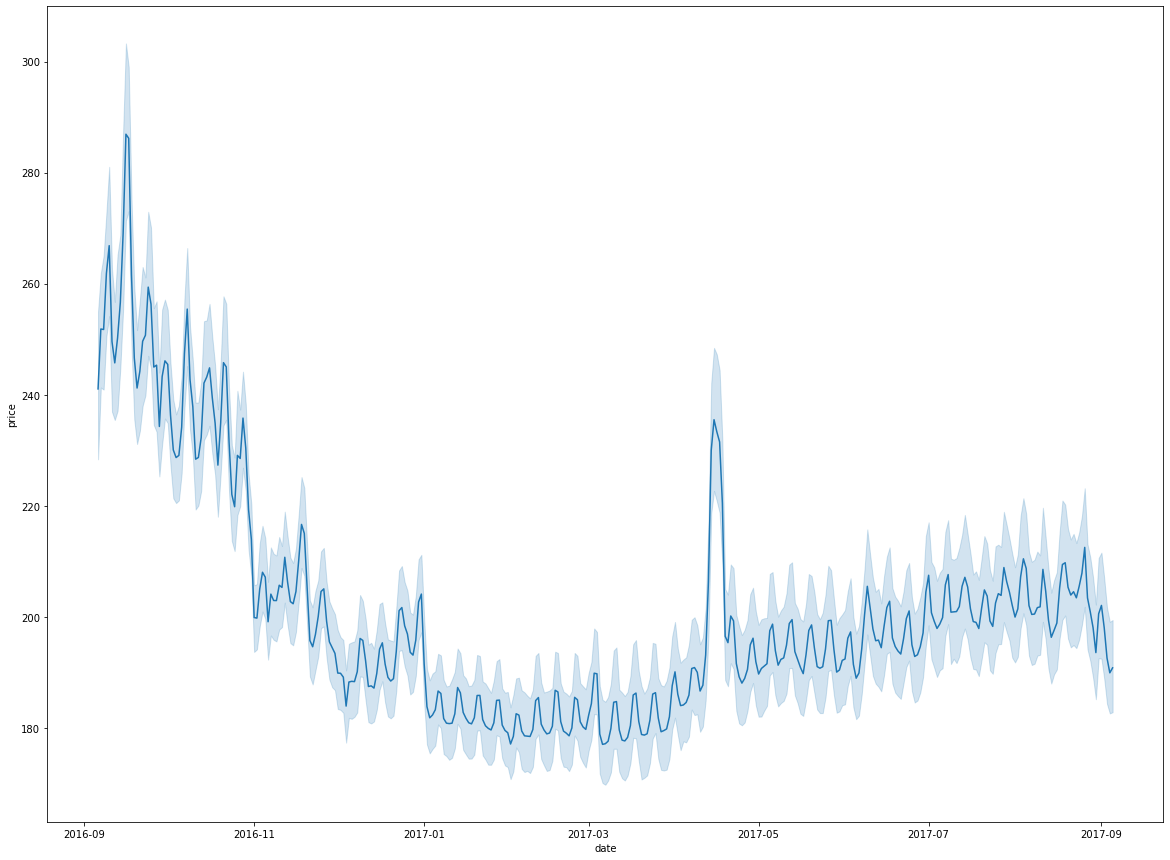

In [30]:
sns.lineplot(data=b_cal, x='date',y='price')

<AxesSubplot:xlabel='date', ylabel='price'>

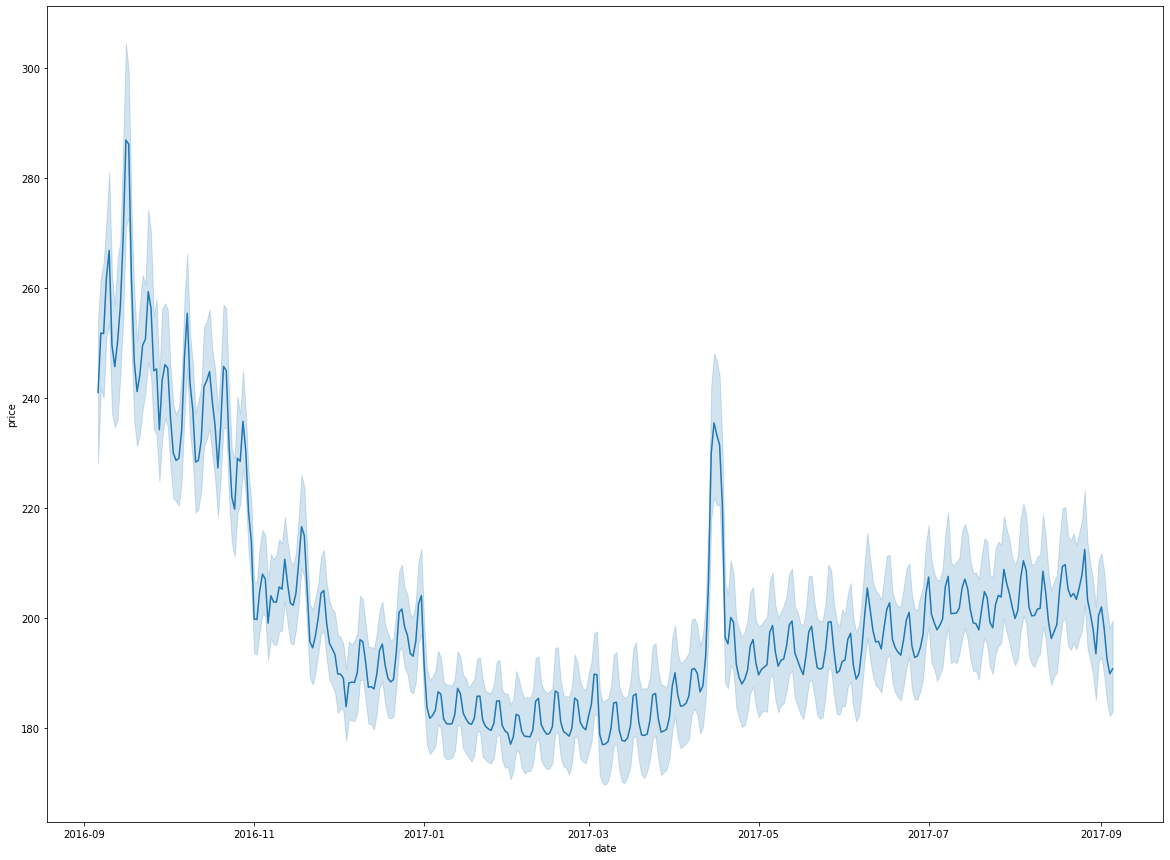

In [31]:
sns.lineplot(data=b_cal, x='date',y='price')

<AxesSubplot:xlabel='weekday', ylabel='price'>

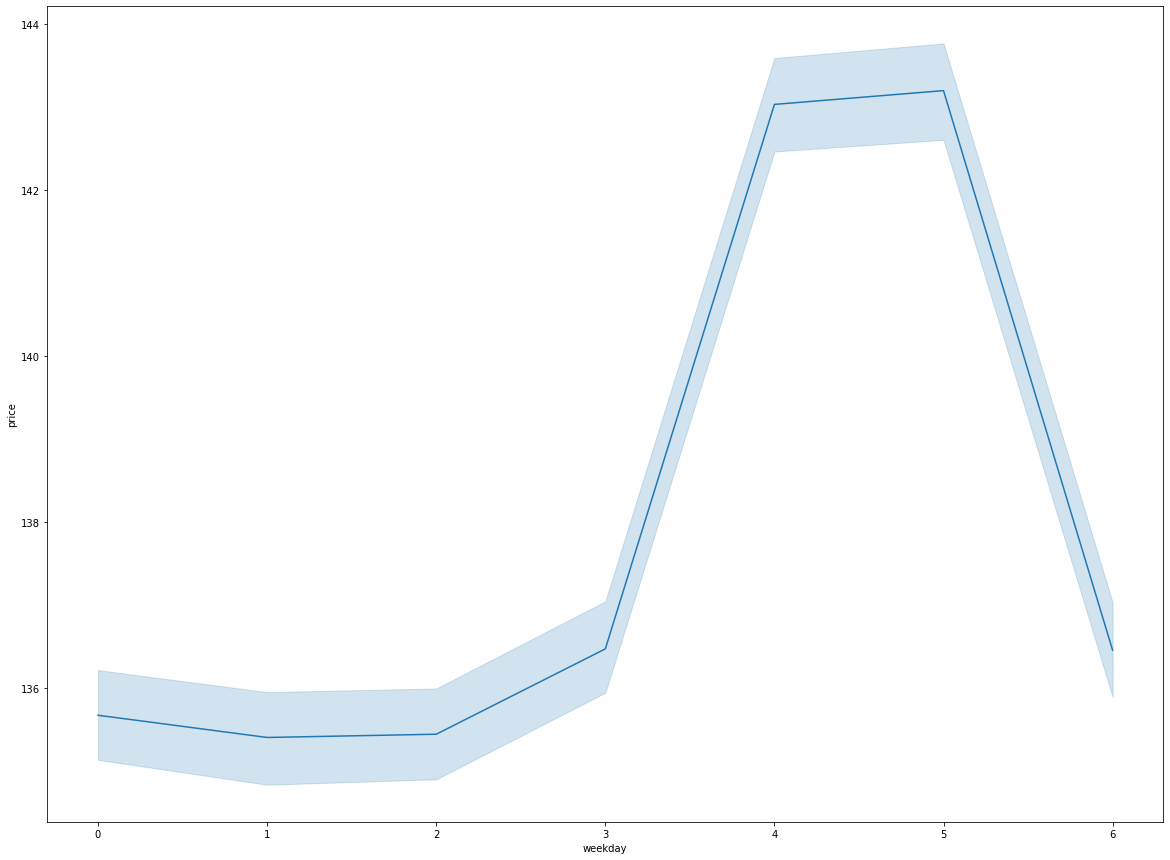

In [32]:
s_cal['weekday'] = s_cal['date'].apply(lambda x: x.weekday())#s_cal['date'].datetime.dayofweek
sns.lineplot(data=s_cal, x='weekday',y='price')

<AxesSubplot:xlabel='weekday', ylabel='avail'>

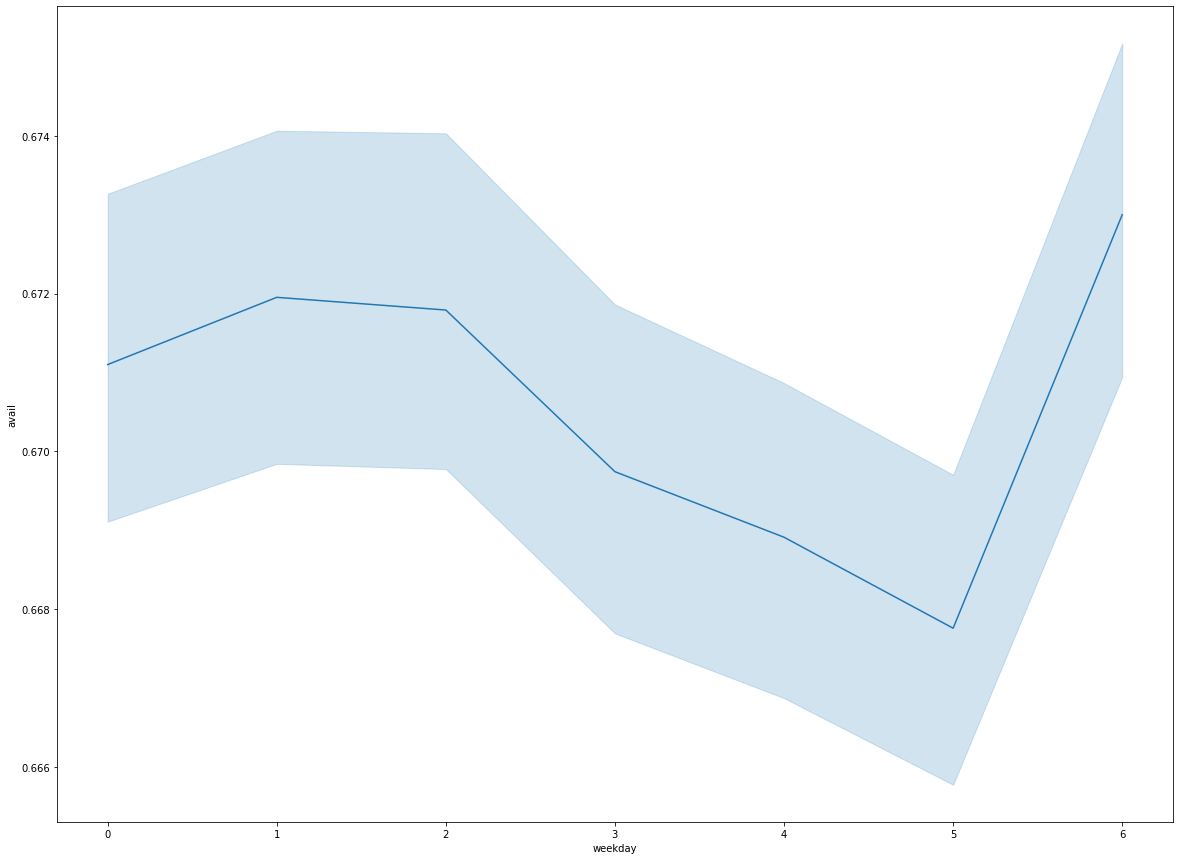

In [52]:
sns.lineplot(data=s_cal, x='weekday',y='avail')

<AxesSubplot:xlabel='weekday', ylabel='price'>

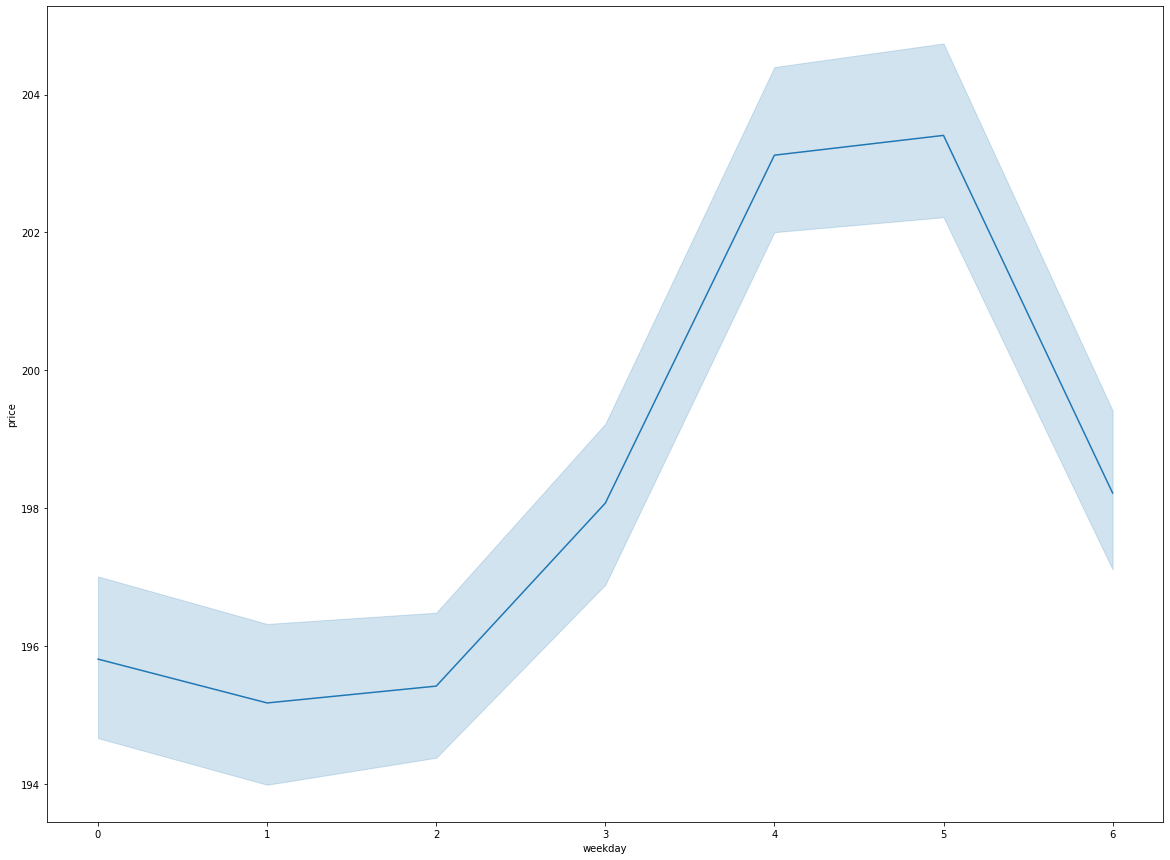

In [33]:
b_cal['weekday'] = b_cal['date'].apply(lambda x: x.weekday())#s_cal['date'].datetime.dayofweek
sns.lineplot(data=b_cal, x='weekday',y='price')

<AxesSubplot:xlabel='weekday', ylabel='avail'>

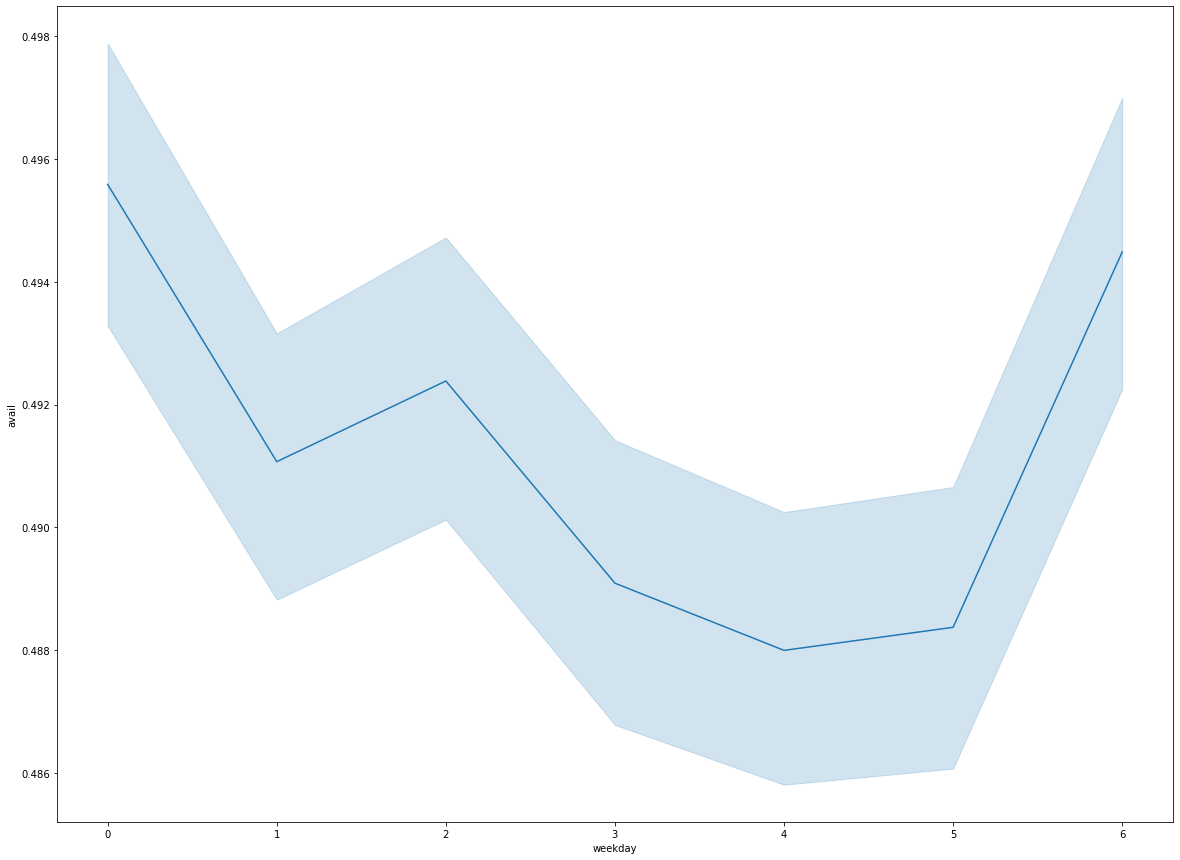

In [53]:
sns.lineplot(data=b_cal, x='weekday',y='avail')

<AxesSubplot:xlabel='weekday', ylabel='price'>

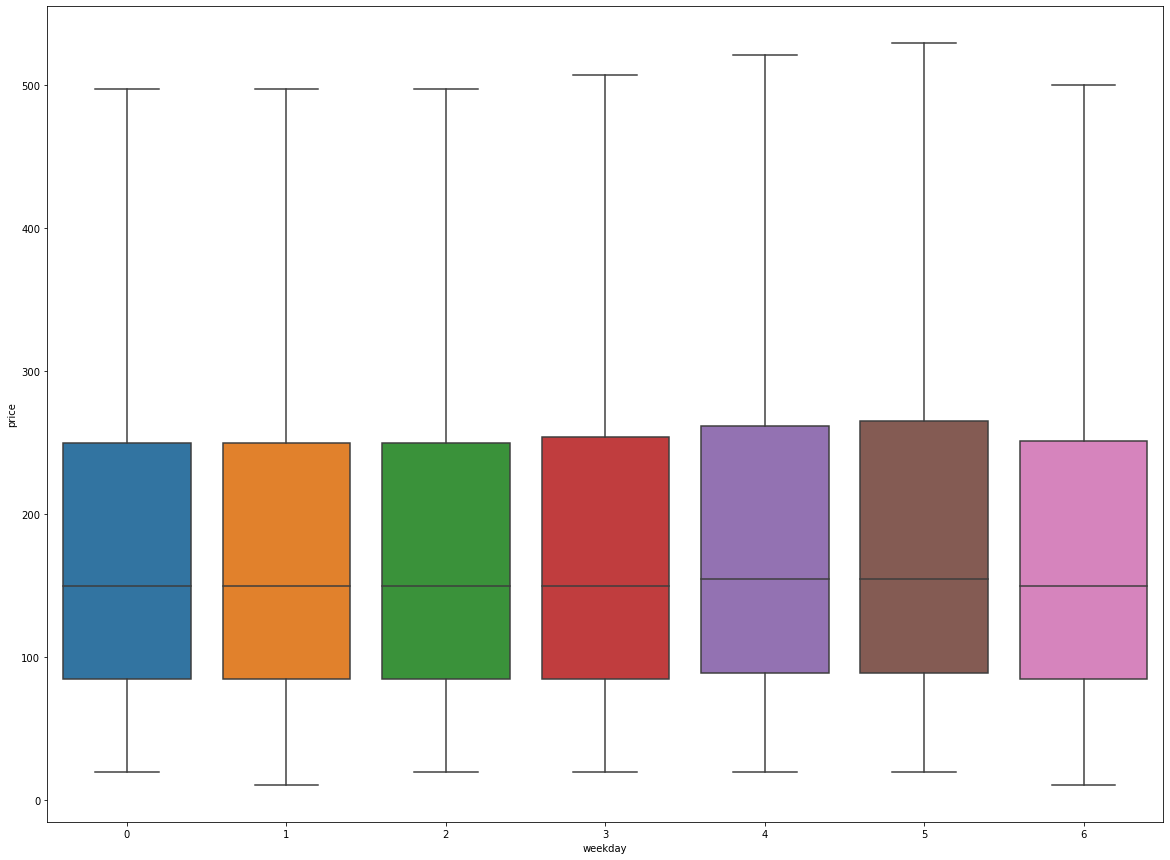

In [34]:
sns.boxplot(data=b_cal, x='weekday',y='price',showfliers = False)
#plt.yscale('log')

<AxesSubplot:xlabel='month', ylabel='price'>

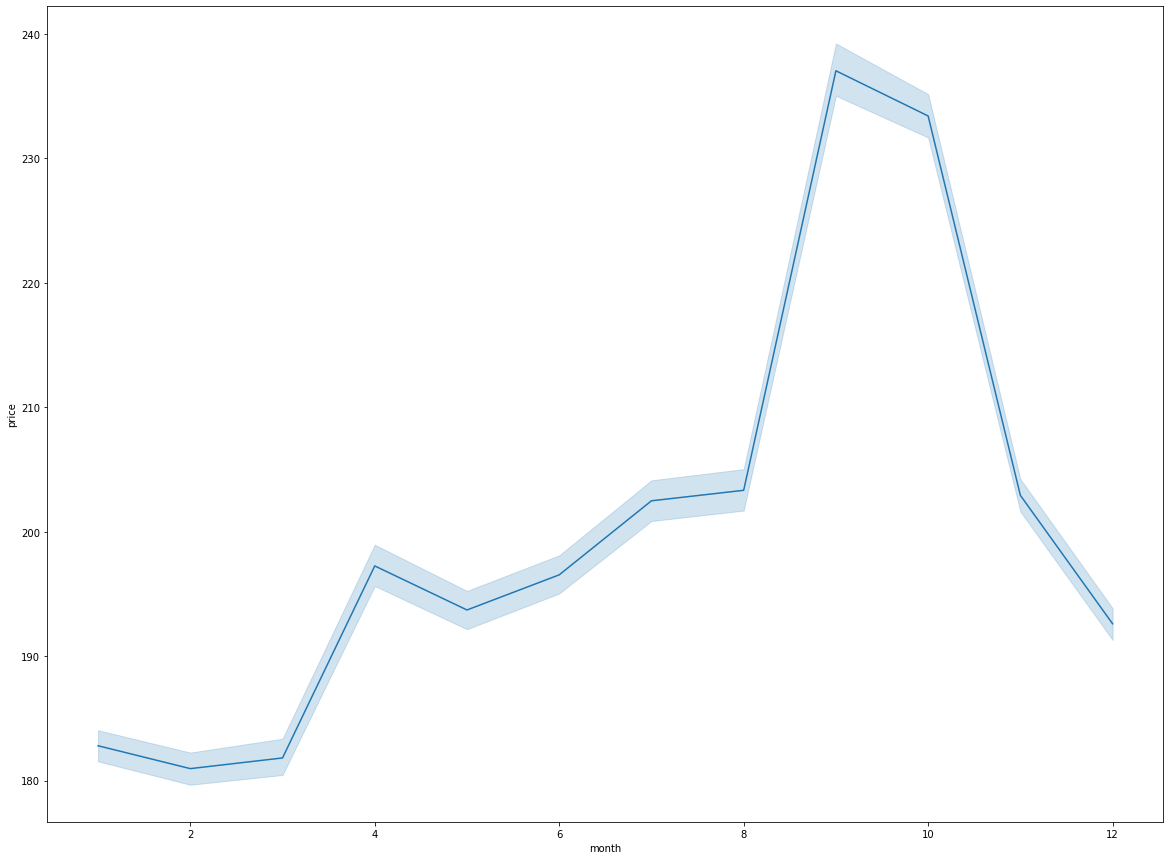

In [35]:
b_cal['month'] = b_cal['date'].apply(lambda x: x.month)#s_cal['date'].datetime.dayofweek
sns.lineplot(data=b_cal, x='month',y='price')

<AxesSubplot:xlabel='month', ylabel='price'>

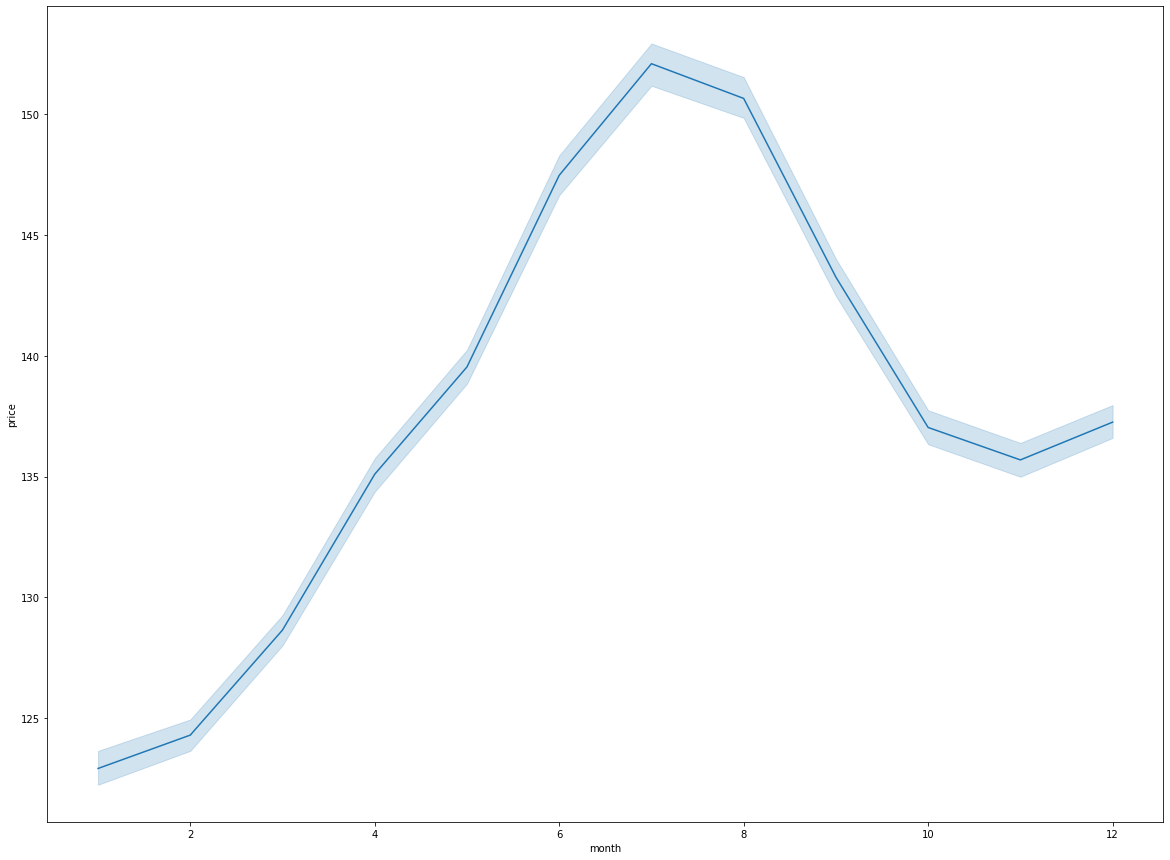

In [36]:
s_cal['month'] = s_cal['date'].apply(lambda x: x.month)#s_cal['date'].datetime.dayofweek
sns.lineplot(data=s_cal, x='month',y='price')

<AxesSubplot:xlabel='month', ylabel='price'>

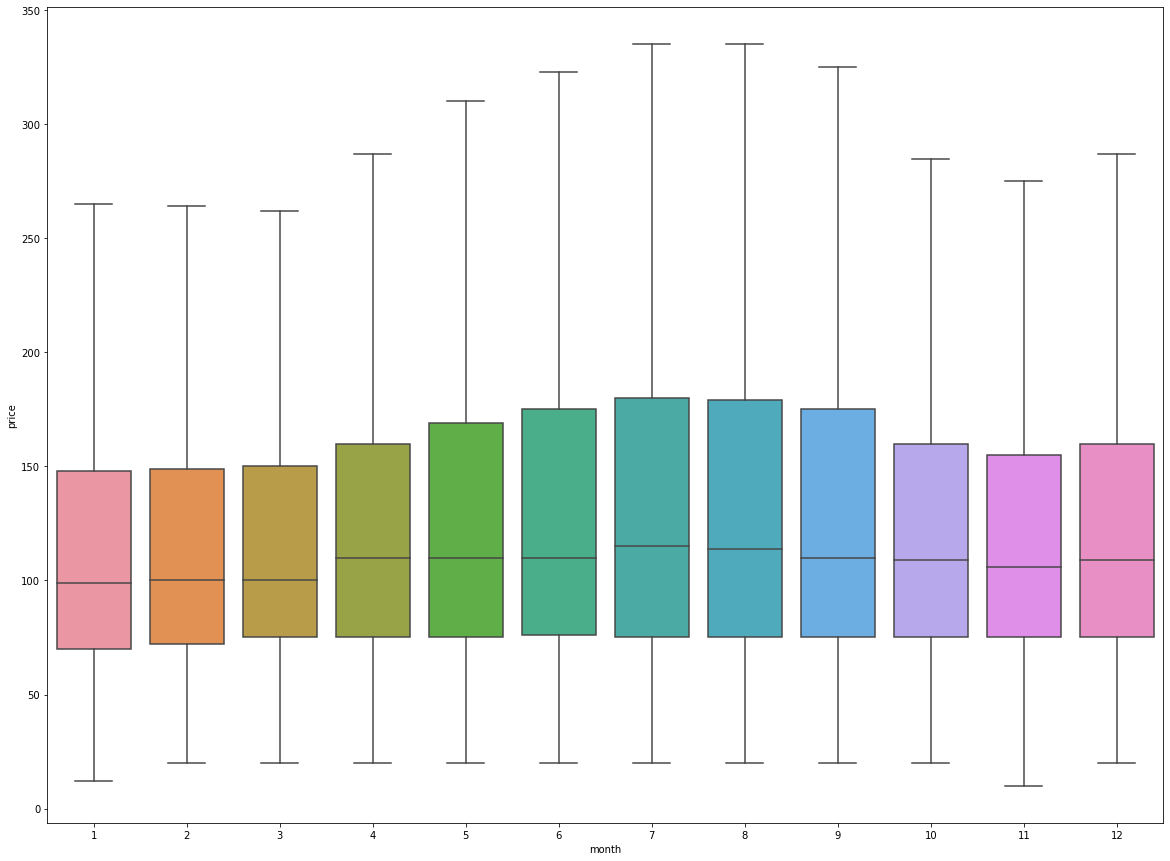

In [37]:
sns.boxplot(data=s_cal, x='month',y='price',showfliers = False)

<AxesSubplot:xlabel='month', ylabel='price'>

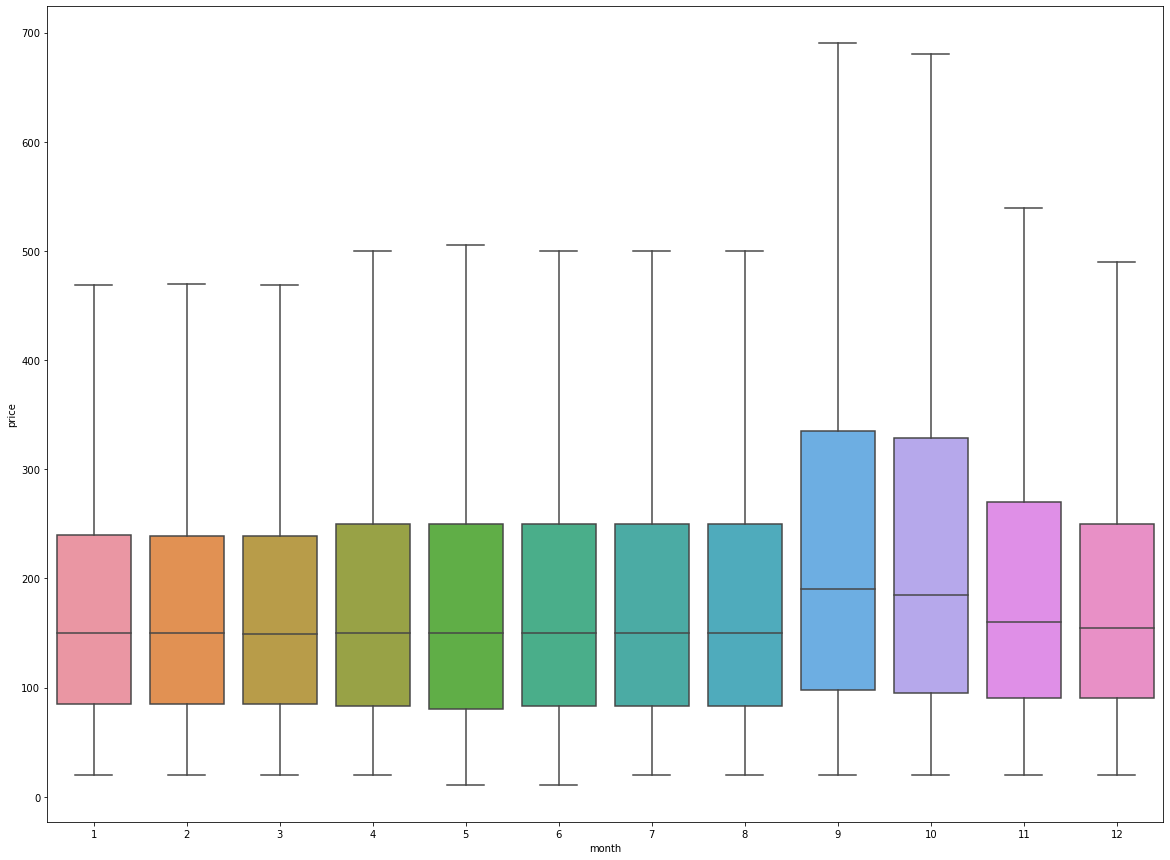

In [38]:
sns.boxplot(data=b_cal, x='month',y='price',showfliers = False)

In [39]:
print(b_list.dtypes.to_string())

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                      

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

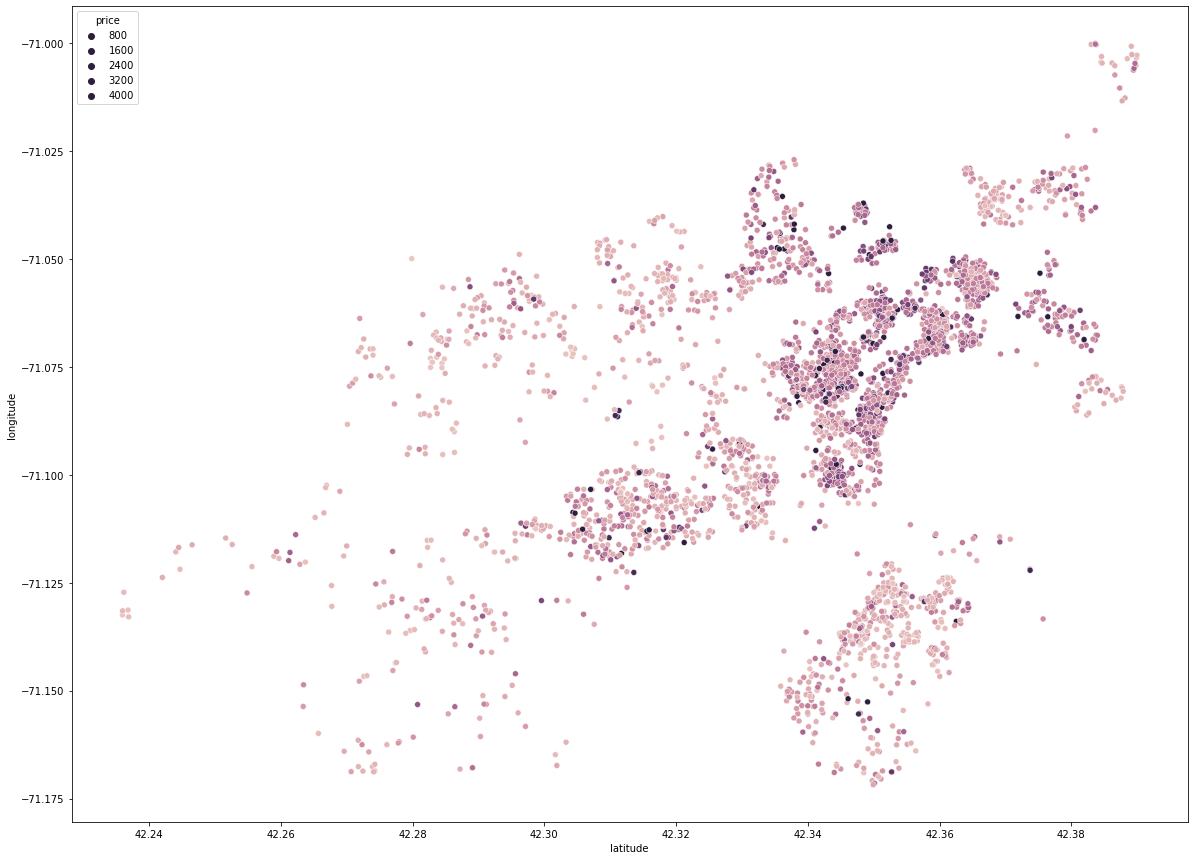

In [40]:
sns.scatterplot(data=b_list, x='latitude',y='longitude',hue='price', hue_norm=(0,500))

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

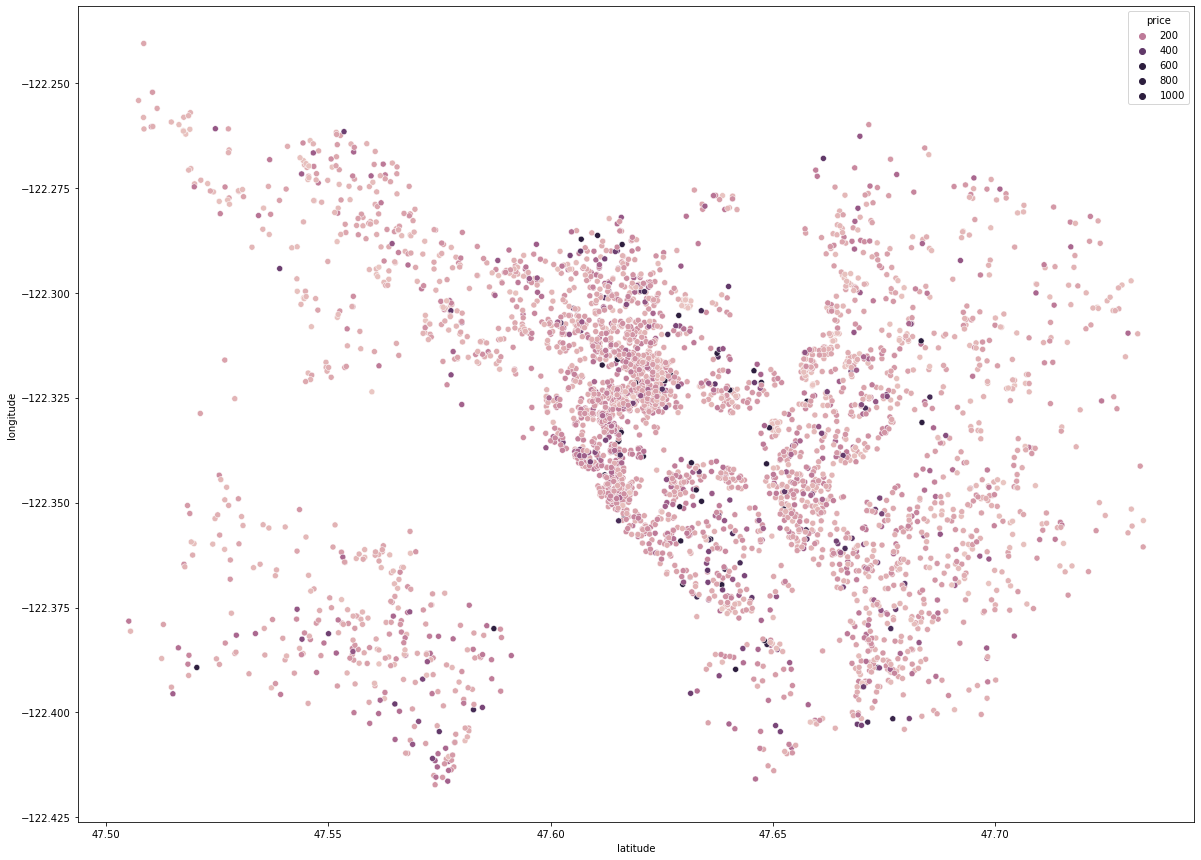

In [41]:
sns.scatterplot(data=s_list, x='latitude',y='longitude',hue='price', hue_norm=(0,500))

<AxesSubplot:>

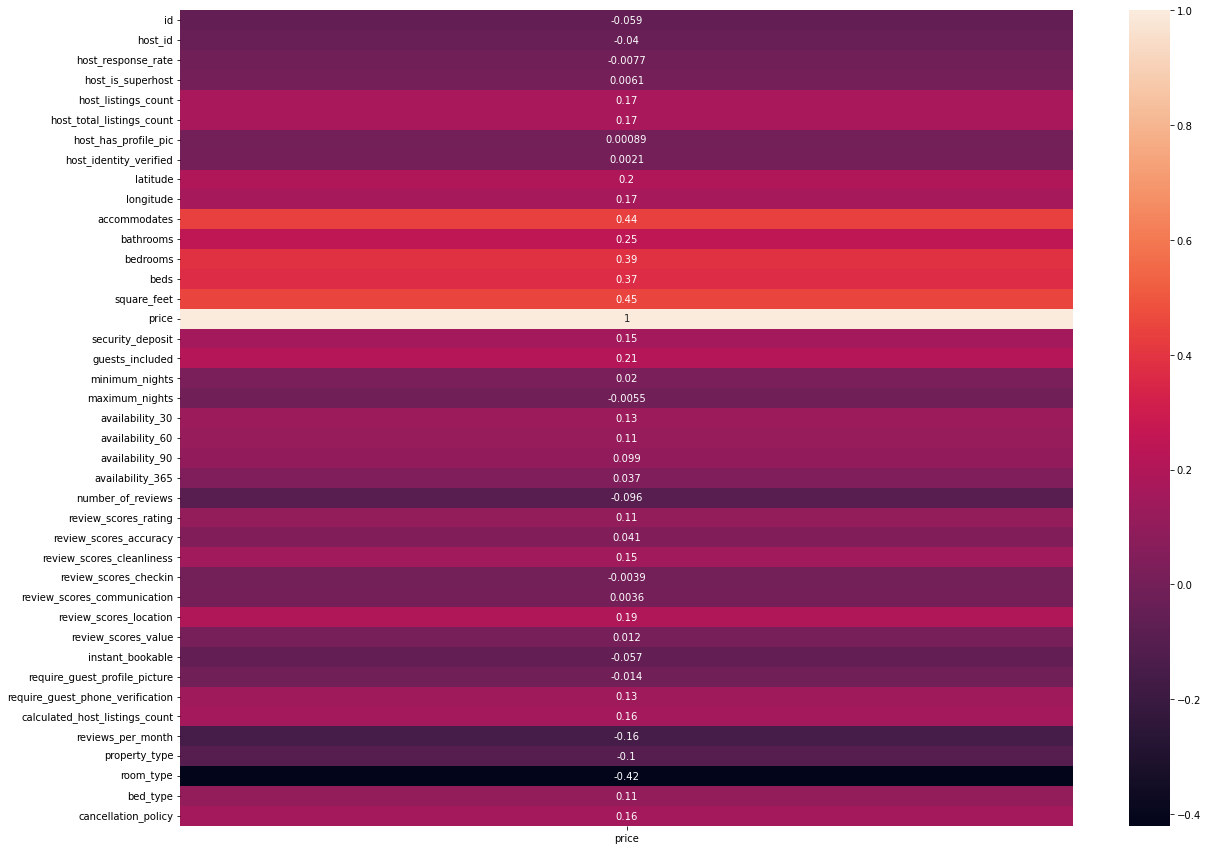

In [42]:
corr=b_list.corr().dropna(how='all').dropna(how='all', axis=1)
sns.heatmap(corr[['price']], annot=True)

<AxesSubplot:>

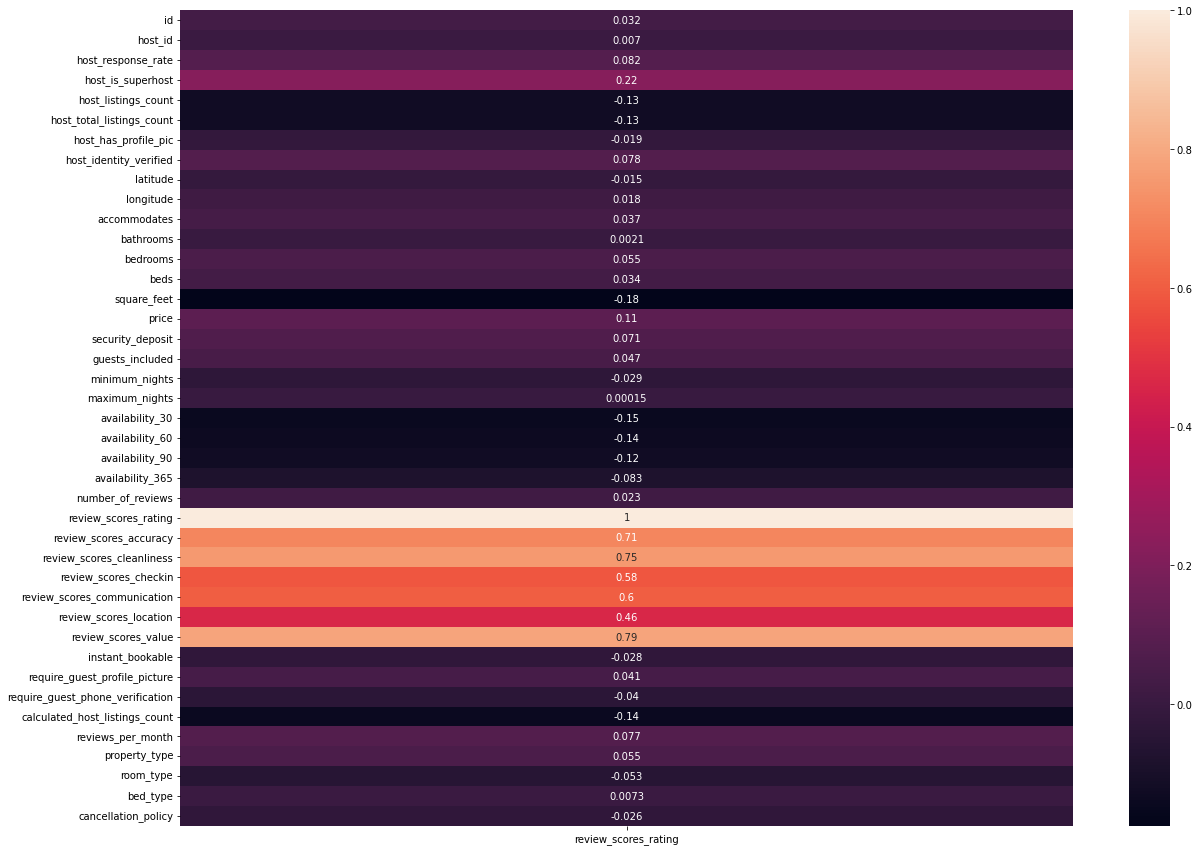

In [43]:
sns.heatmap(corr[['review_scores_rating']], annot=True)

<AxesSubplot:>

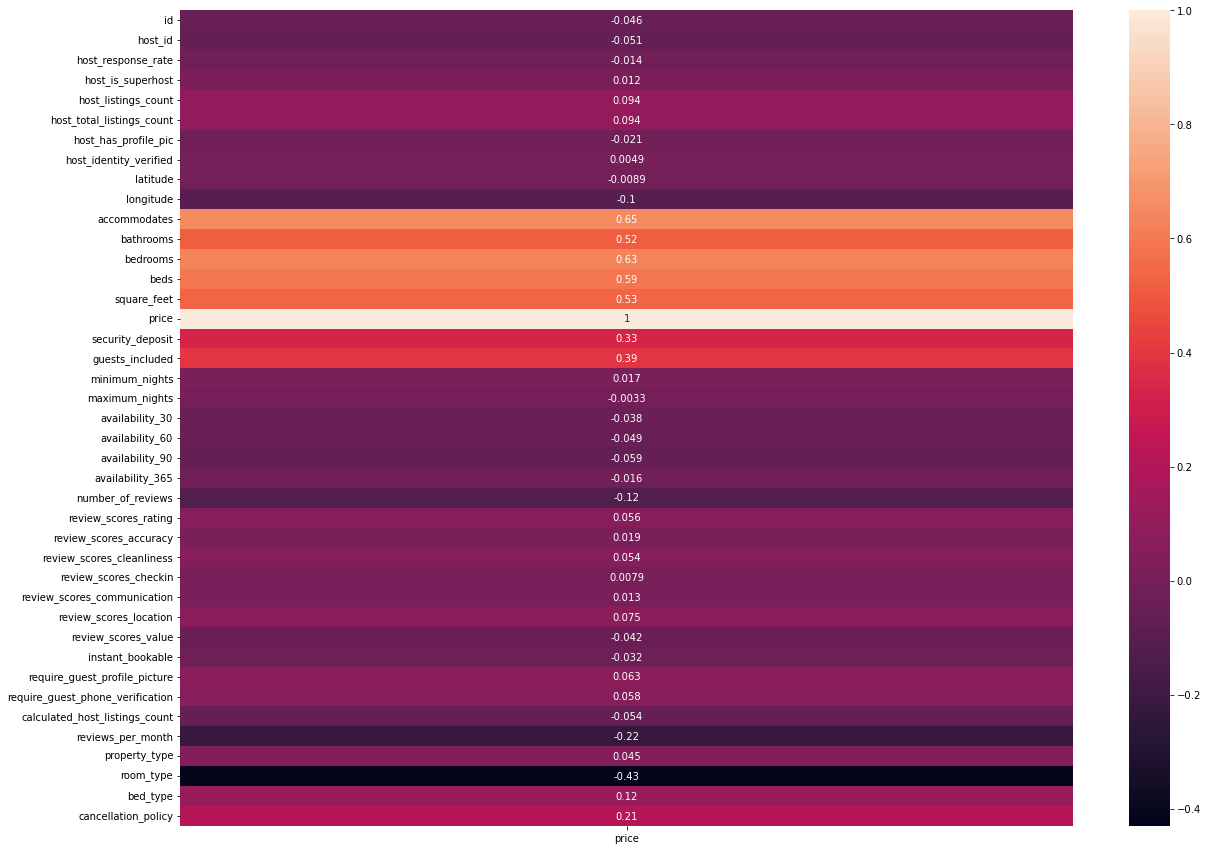

In [44]:
corr=s_list.corr().dropna(how='all').dropna(how='all', axis=1)
sns.heatmap(corr[['price']], annot=True)

<AxesSubplot:>

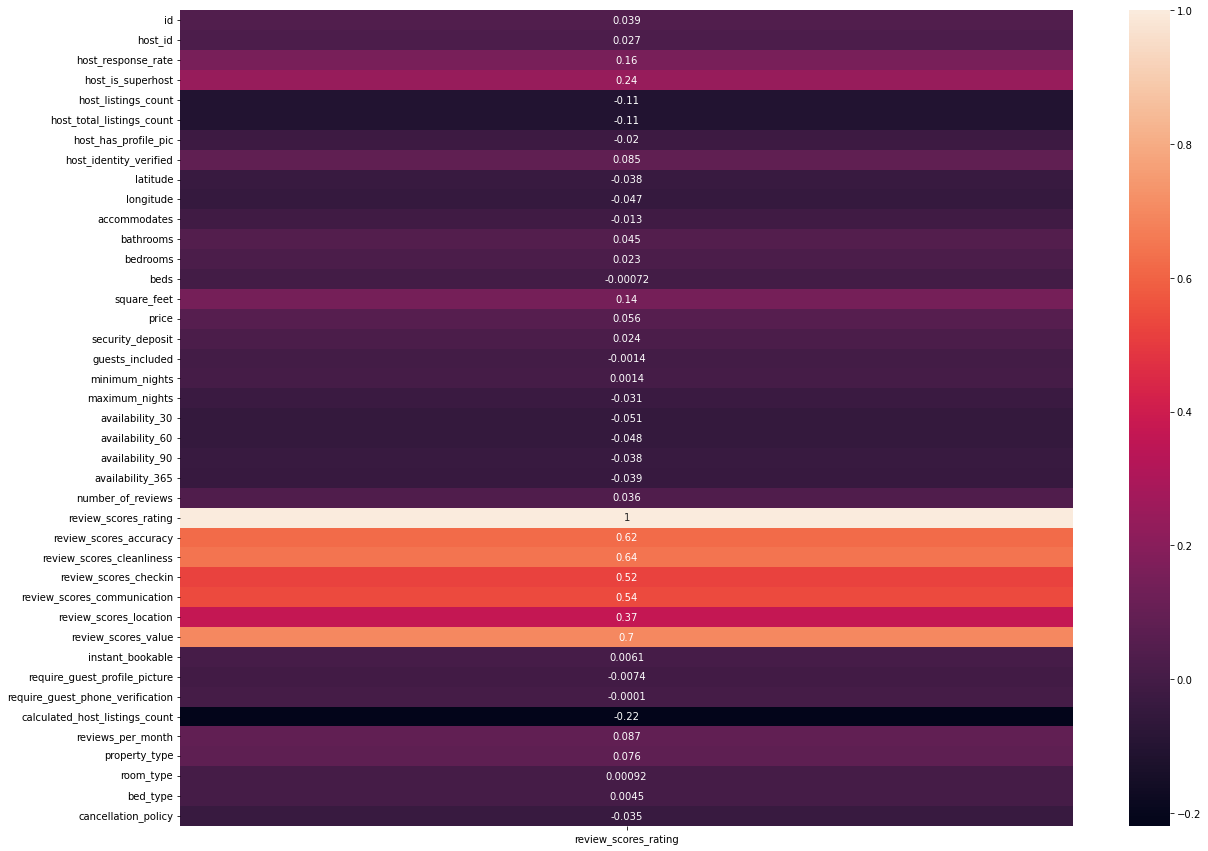

In [45]:
sns.heatmap(corr[['review_scores_rating']], annot=True)

/var/folders/dc/11dz__fx4n117dfk45w48w300000gn/T/ipykernel_23880/3842730845.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sns.histplot(data=s_list.groupby('id')['review_scores_rating','price'].mean().dropna(), x='price', hue='review_scores_rating', multiple="stack")


<AxesSubplot:xlabel='price', ylabel='Count'>

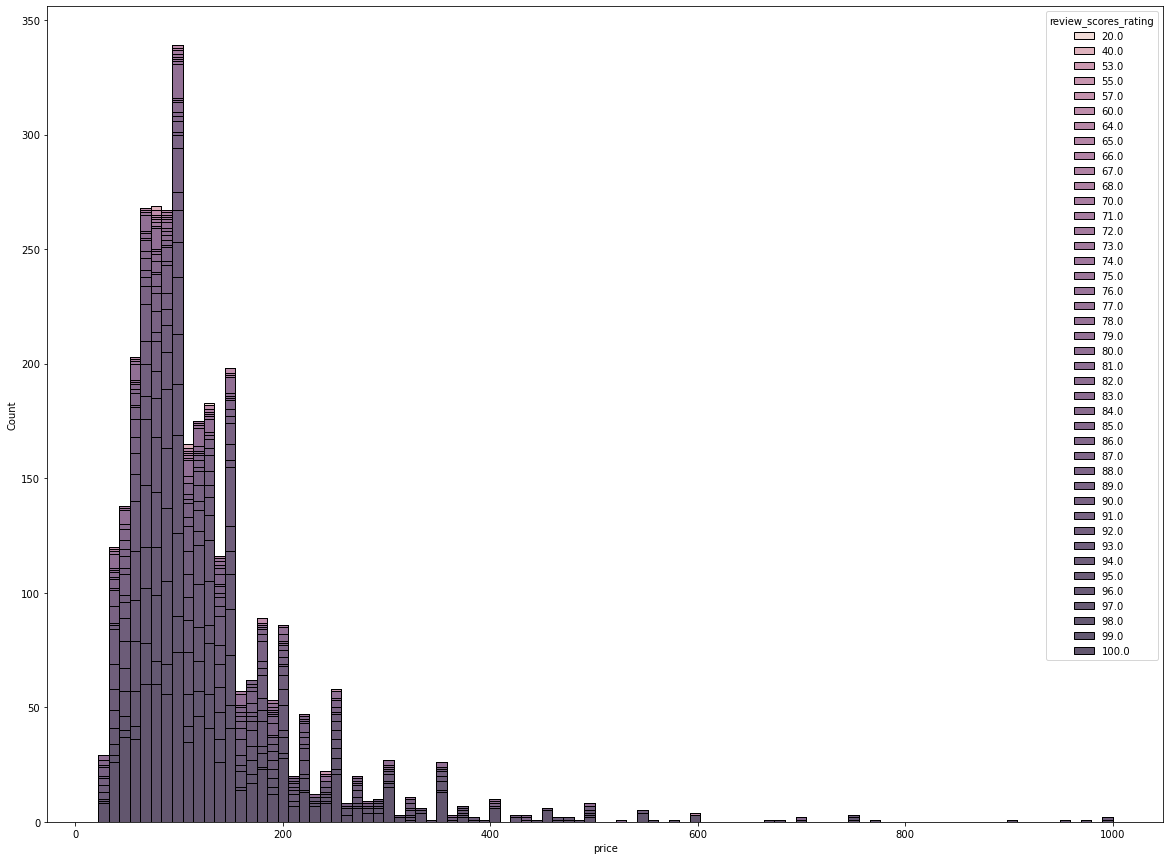

In [46]:
sns.histplot(data=s_list.groupby('id')['review_scores_rating','price'].mean().dropna(), x='price', hue='review_scores_rating', multiple="stack")

/var/folders/dc/11dz__fx4n117dfk45w48w300000gn/T/ipykernel_23880/70090933.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sns.histplot(data=b_list.groupby('id')['review_scores_rating','price'].mean().dropna(), x='price', hue='review_scores_rating', multiple="stack")


<AxesSubplot:xlabel='price', ylabel='Count'>

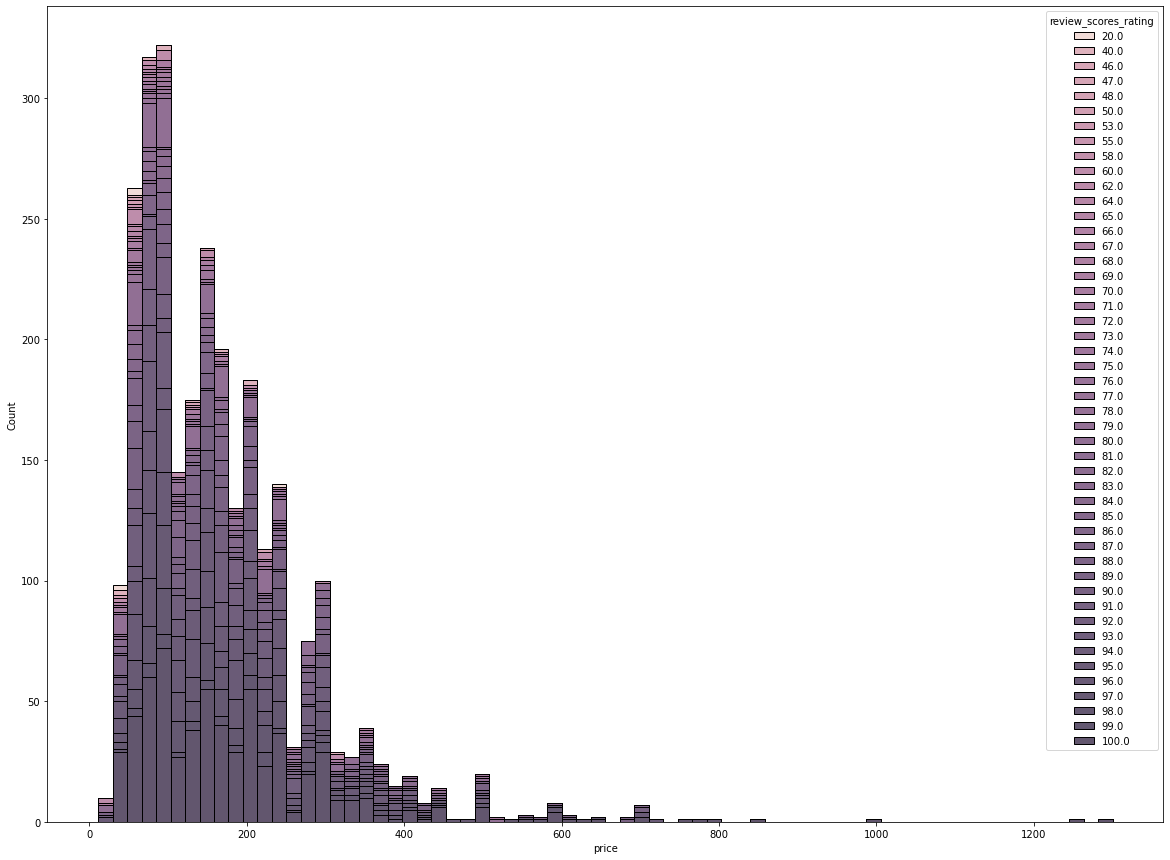

In [47]:
sns.histplot(data=b_list.groupby('id')['review_scores_rating','price'].mean().dropna(), x='price', hue='review_scores_rating', multiple="stack")

In [48]:
print(b_list.dtypes.to_string())

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                      